<a href="https://colab.research.google.com/github/Manel-MH/Sales-Predictions/blob/main/Project1_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 1 Part 1 

Mount Drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [2]:
#import libraries
import pandas as pd
import numpy as np

Load Data

In [3]:
#create a file name 
SalesPredictions = "/content/drive/MyDrive/Colab Notebooks/datasets/sales_predictions.csv"
#load data 
df_SalesPredictions = pd.read_csv(SalesPredictions)
#check head of data
print(df_SalesPredictions.head())
#check tail of data
print(df_SalesPredictions.tail())
#check data as df
df_SalesPredictions.head()

  Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0           FDA15         9.30  ...  Supermarket Type1          3735.1380
1           DRC01         5.92  ...  Supermarket Type2           443.4228
2           FDN15        17.50  ...  Supermarket Type1          2097.2700
3           FDX07        19.20  ...      Grocery Store           732.3800
4           NCD19         8.93  ...  Supermarket Type1           994.7052

[5 rows x 12 columns]
     Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[5 rows x 12 columns]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Week 2 Part 2

Explore Data

Check columns datatype in df_SalesPredictions

In [4]:
#check info on df_SalesPredictions
df_SalesPredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Check shape of df_SalesPredictions

In [5]:
#check shape of df_SalesPredictions
#this output gives us numbers of (rows, columns)
df_SalesPredictions.shape

(8523, 12)

Check for and remove any duplicates in df_SalesPredictions

In [6]:
df_SalesPredictions.duplicated().any()

False

In [7]:
print('There are no duplicated rows (repeated data points) in this dataset.')

There are no duplicated rows (repeated data points) in this dataset.


Check for missing values

In [8]:
#is there missing values ?
#we always want .isnull().sum() to return zero
#.isnull().sum() != 0, we have missing values
df_SalesPredictions.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
print('There are 1463 missing values for the column Item_Weight and 2410 missing values for the column Outlet_Size.')

There are 1463 missing values for the column Item_Weight and 2410 missing values for the column Outlet_Size.


In [10]:
#is there irrelevant data/ mis-categorized data?
#run a .value_counts per column
Item_IdentifierIrr = df_SalesPredictions['Item_Identifier'].value_counts() 
Item_IdentifierIrr

FDW13    10
FDG33    10
NCI54     9
NCF42     9
FDT07     9
         ..
FDT35     1
FDC23     1
FDY43     1
DRF48     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [11]:
Item_WeightIrr = df_SalesPredictions['Item_Weight'].value_counts() 
Item_WeightIrr

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [12]:
Item_Fat_ContentIrr = df_SalesPredictions['Item_Fat_Content'].value_counts()
Item_Fat_ContentIrr 
print(Item_Fat_ContentIrr)             
Item_VisibilityIrr = df_SalesPredictions['Item_Visibility'].value_counts()
Item_VisibilityIrr 
print(Item_VisibilityIrr)                
Item_TypeIrr = df_SalesPredictions['Item_Type'].value_counts() 
Item_TypeIrr
print(Item_TypeIrr)                     
Item_MRPIrr = df_SalesPredictions['Item_MRP'].value_counts()
Item_MRPIrr
print(Item_MRPIrr)                         
Outlet_IdentifierIrr = df_SalesPredictions['Outlet_Identifier'].value_counts()
Outlet_IdentifierIrr 
print(Outlet_IdentifierIrr)               
Outlet_Establishment_YearIrr = df_SalesPredictions['Outlet_Establishment_Year'].value_counts()
Outlet_Establishment_YearIrr
print(Outlet_Establishment_YearIrr)        
Outlet_SizeIrr = df_SalesPredictions['Outlet_Size'].value_counts()
Outlet_SizeIrr 
print(Outlet_SizeIrr)                  
Outlet_Location_TypeIrr = df_SalesPredictions['Outlet_Location_Type'].value_counts()
Outlet_Location_TypeIrr 
print(Outlet_Location_TypeIrr)             
Outlet_TypeIrr = df_SalesPredictions['Outlet_Type'].value_counts()
Outlet_TypeIrr 
print(Outlet_TypeIrr)                     
Item_Outlet_SalesIrr = df_SalesPredictions['Item_Outlet_Sales'].value_counts()
Item_Outlet_SalesIrr 
print(Item_Outlet_SalesIrr)    

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
172.0422    7
188.1872    6
170.5422    6
109.5228    6
196.5084    6
           ..
212.8218    1
190.3872    1
162.6868    1
189.1214    1
51.3008

Clean up the Item_Fat_Content

A .value.counts() on the column Item_Fat_Content turns up that the categories Low Fat or Regular are not reported uniformaly throughout the dataset. We need to have this uniform. We will change all entries into Low Fat or Regular where appropriate.

In [13]:
#we need only two categories Low Fat or Regular
#replacing values of cells in particular column
df_SalesPredictions['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [14]:
Item_Fat_ContentIrr = df_SalesPredictions['Item_Fat_Content'].value_counts()
Item_Fat_ContentIrr 
print(Item_Fat_ContentIrr)    

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Strategy to handle missing values

In [15]:
# continuous variable Item_Weight
# filling missing values 
# with mean column values
# create a variable mean and assign it the mean of the column Item_Weight
mean = df_SalesPredictions['Item_Weight'].mean()
df_SalesPredictions['Item_Weight'].fillna(value = mean, inplace=True)

In [16]:
# to check if I managed to handle missing values
# .isnull().sum() != 0, we have missing values
df_SalesPredictions.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
#categorical variable Outlet_Size
#Treat missing data as just another category : Unknown
df_SalesPredictions['Outlet_Size'].fillna('unknown', inplace=True)

In [18]:
Outlet_SizeIrr = df_SalesPredictions['Outlet_Size'].value_counts()
Outlet_SizeIrr 
print(Outlet_SizeIrr)

Medium     2793
unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64


Some stats

In [19]:
#stats on the dataframe
#DESCRIBE - statistical summary of each column, such as count, column mean value, column standard deviation
#Note: item visibility needs to be multiplied by 100; the best column to look at stats summary is Item_Oulet_Sales
df_SalesPredictions.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Week 3
Statistical Analysis

Histogram to view the distributions of various features in your dataset.

Boxplot to view statistical summaries of various features in your dataset.

Heatmap of the correlation between features

In [20]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

We will work with the numerical dtypes 

In [21]:
#what are the dtype float64, int64 (numerical)
#select only numerical dtype
#Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year, Item_Outlet_Sales
#the feature to be analyzed is the target variable Item_Outlet_Sales primarily

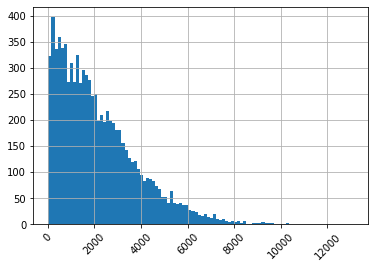

In [22]:
#histogram for Item_Outlet_Sales
df_SalesPredictions['Item_Outlet_Sales'].hist(bins = 100)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

This histogram showcases the outlet sales, the X axis is the number of sales and the Y axis is the outlet sales. The distribution is skewed to the right. This means that we need to report the dataset mean, median, mode which are all different compared to a normal distribution. 

In [23]:
#report mean
print(df_SalesPredictions['Item_Outlet_Sales'].mean())
print('The mean for the outlet sales column is $2181.30')
#report median
print(df_SalesPredictions['Item_Outlet_Sales'].median())
print('The median for the outlet sales column is $1794.30')
#report mode
print(df_SalesPredictions['Item_Outlet_Sales'].mode())
print('The mode for the outlet sales column is $958.75')

2181.2889135750365
The mean for the outlet sales column is $2181.30
1794.3310000000001
The median for the outlet sales column is $1794.30
0    958.752
dtype: float64
The mode for the outlet sales column is $958.75


Let's try to extract dtype numerical columns to compare them between themselves

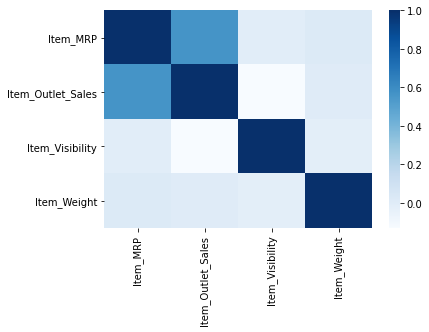

In [24]:
#select only dtype float64
dtype_numerical = df_SalesPredictions[['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight']]
#correlation between dtype_numerical and heatmap
corr = dtype_numerical.corr()
sns.heatmap(corr, cmap= 'Blues');

The heat map showcases that our outlet sales variable has a strong positive correlation with the Item_MRP variable which makes sense since the latter is the maximum retail price; the variable Item_weight is weakly correlated to the variable outlet sales as it seems the weigth has no influence on it.


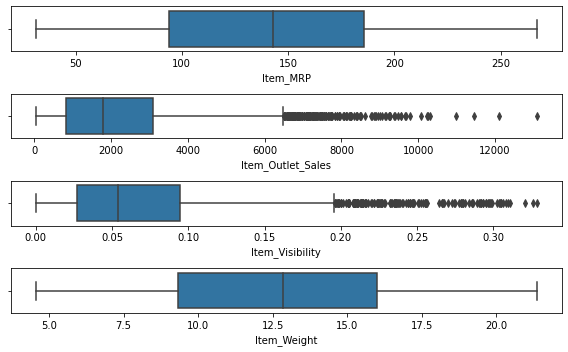

In [25]:
#boxplots for dtype_numerical
fig, axs = plt.subplots(4, figsize = (8,5))
warnings.simplefilter(action="ignore", category=FutureWarning)
plt1 = sns.boxplot(df_SalesPredictions['Item_MRP'], ax = axs[0]);
plt2 = sns.boxplot(df_SalesPredictions['Item_Outlet_Sales'], ax = axs[1]);
plt3 = sns.boxplot(df_SalesPredictions['Item_Visibility'], ax = axs[2]);
plt4 = sns.boxplot(df_SalesPredictions['Item_Weight'], ax = axs[3]);
plt.tight_layout()

Doing a boxplot analysis on the dtype_numerical columns showcases our finidngs that the outlet sales variable is skewed to the right with outliers spread to left. The visibilty of items seem to also be skewed to the right. since we replaced missing values in Item_Weight column with the mean value it seems correct that this boxplot is as is; 

Another interesting thing would be to see if there is some correlation between the size of the outlet and outlet sales

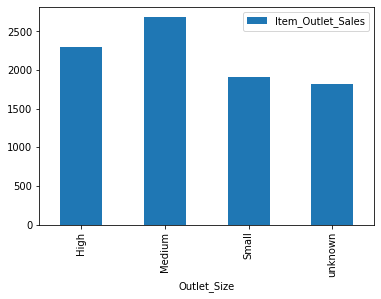

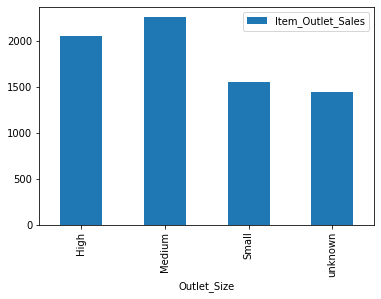

In [26]:
#use groupby
df_SalesPredictions.groupby(['Outlet_Size'])[['Item_Outlet_Sales']].mean().plot(kind='bar');
df_SalesPredictions.groupby(['Outlet_Size'])[['Item_Outlet_Sales']].median().plot(kind='bar');

Making a barchart to show the outlet sales for different outlet size, shows that Medium size outlet have the highest outlet sales.

Week 4 Vizualisation

 Numeric - Categorical Analysis

 let's do our analysis between categorical variable Outlet_Size vs the numerical variable Item_Outlet_Sales with a boxplot as well

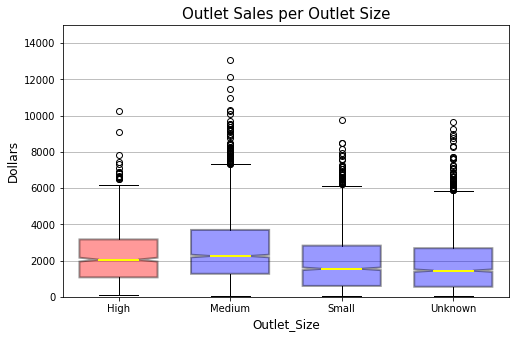

In [27]:
#plot the Item_Outlet_Sales for Outlet_Size
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)
high = df_SalesPredictions.loc[df_SalesPredictions['Outlet_Size']=='High','Item_Outlet_Sales']
medium = df_SalesPredictions.loc[df_SalesPredictions['Outlet_Size']=='Medium','Item_Outlet_Sales']
small = df_SalesPredictions.loc[df_SalesPredictions['Outlet_Size']=='Small','Item_Outlet_Sales']
unknown = df_SalesPredictions.loc[df_SalesPredictions['Outlet_Size']=='unknown','Item_Outlet_Sales']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([high, medium, small, unknown],
           notch = True,
           labels=['High', 'Medium', 'Small', 'Unknown'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Outlet_Size', fontsize = 12)
plt.ylabel('Dollars', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.ylim(bottom=0,top=15000)
plt.grid(axis = 'y')
plt.title('Outlet Sales per Outlet Size', fontsize = 15);

The boxplot visualization confirms the barcharts results based on median and mean; Medium size outlets do the most sales.

Week 5 Linear Regression Model

In [28]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [29]:
#check our dataframe
df_SalesPredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [30]:
df_SalesPredictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Drop Columns

In [31]:
#remove column Item_Identifier
df_SalesPredictions.drop(['Item_Identifier'], axis=1, inplace=True)

Change Categorical data

In [32]:
# Method 1: Pandas get_dummies
df_SalesPredictions = pd.get_dummies(df_SalesPredictions, columns = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first = False)

In [33]:
df_SalesPredictions.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


Assign Target and features

In [34]:
#assign the target (y) and features (X)
y = df_SalesPredictions['Item_Outlet_Sales']
X = df_SalesPredictions.drop(columns = 'Item_Outlet_Sales')

Train test Split

In [35]:
#Train Test Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [36]:
X_train.shape

(6392, 43)

In [37]:
X_test.shape

(2131, 43)

In [38]:
y_train.shape

(6392,)

In [39]:
y_test.shape

(2131,)

In [40]:
#step 1
#import the model 
from sklearn.linear_model import LinearRegression

In [41]:
#step 2
#make a linear regression instance 
lnreg = LinearRegression()

In [42]:
#step 3 
#train the model on the training data
#relationship between X and y
lnreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#step 4 
#make predictions based on the model
# or to predict all values on the training data
train_preds = lnreg.predict(X_train)
# predict the values in the test set
test_preds = lnreg.predict(X_test)

Measure Model Performance

In [44]:
#R^2 coef of determination training set
train_score = lnreg.score(X_train, y_train)
print(train_score)

0.5615551419174628


In [45]:
#R^2 coef of determination test set
test_score = lnreg.score(X_test, y_test)
print(test_score)

0.5671041872384912


The default metric for evaluating a regression model is R^2, the coefficient of determination.

The best possible score for R^2 is 1.0, and the higher the R^2 the better. R^2 is given as a decimal, but usually interpreted as a percent.

The R^2 value on our training set is 0.561 and the R^2 value on our test set is 0.567. When evaluating a model, we are mostly concerned with how it does on unseen data (our test set), but it is common to also see how our train and test set scores compare to each other. In this case, our train and test scores are similar which means that our model is not overfit.

For our data, an R^2 of 0.567 can be interpreted as: 56.7% of the variance in our target vector ('Item_Outlet_Sales') can be explained by the variance in our features X. (the variation in our Target can be explained by the features of our model).

In [46]:
#RMSE
from sklearn.metrics import mean_squared_error
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, lnreg.predict(X_train))))
print('Testing RMSE:' , np.sqrt(mean_squared_error(y_test, lnreg.predict(X_test))))

Training RMSE: 1139.1040937388918
Testing RMSE: 1092.8630817241494


Trainning RMSE is equal to 1139.1040 dollars.

Testing RMSE is equal to 1092.86 dollars. Our model is +/- 1092.86 dollars off when predicting the target vector.

Which features are most associated with higher predicted sales?

In [47]:
#run .corr() to df_SalesPredictions
#all variables' correlation to each other
corr = df_SalesPredictions.corr()
corr
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales                  1.000000
Item_MRP                           0.567574
Outlet_Type_Supermarket Type3      0.311192
Outlet_Identifier_OUT027           0.311192
Outlet_Size_Medium                 0.204701
Outlet_Type_Supermarket Type1      0.108765
Outlet_Location_Type_Tier 2        0.058261
Outlet_Identifier_OUT035           0.052823
Outlet_Location_Type_Tier 3        0.046376
Outlet_Identifier_OUT049           0.034264
Outlet_Identifier_OUT017           0.032610
Item_Type_Fruits and Vegetables    0.025950
Outlet_Identifier_OUT013           0.024170
Outlet_Size_High                   0.024170
Item_Type_Snack Foods              0.022782
Outlet_Identifier_OUT046           0.019803
Item_Fat_Content_Regular           0.018719
Item_Type_Household                0.015701
Item_Type_Starchy Foods            0.015039
Item_Weight                        0.011550
Item_Type_Dairy                    0.008858
Item_Type_Canned                   0.007387
Item_Type_Seafood               

The most associated features with a higher predicted target vector are 
Item_MRP             with r     =   0.567574, 
Outlet_Type_Supermarket Type3  with r =    0.311192,
Outlet_Identifier_OUT027      with r=     0.311192 and 
Outlet_Size_Medium    with r =             0.204701.

Week 6 Decision Tree, Bagged Tree and Random Forest models

In [48]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#Import the decision regressor
from sklearn.tree import DecisionTreeRegressor
# Import the bagging regressor
from sklearn.ensemble import BaggingRegressor
# Import random forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [49]:
#check dataframe
df_SalesPredictions.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


Decision Trees

In [50]:
#Step 1: Import the model you want to use
# This was already imported earlier
from sklearn.tree import DecisionTreeClassifier

In [51]:
#Step 2: Make an instance of the model
# By leaving the parenthesis empty, we are choosing to use all of the default parameters
# let's set our random_state=42
dec_tree = DecisionTreeRegressor(random_state = 42)

In [52]:
#Step 3: Fit the model using your training data.  
#The model is learning the relationship between the features (X) and the target (y)
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [53]:
#Step 4: Predict the target values for the training set and the test test.  
#(Note: You can get the score without this step)
#(but if you want to actually see what the predictions are, this is a helpful step)
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [54]:
#Step 5: Evaluate the Model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.19267528293754568


The evaluation metric used here is the R^2. The default decision tree had a perfect R^2 score on the training data than it does on the test data. This is an indication that the model is overfit. We have to improve it.

In [55]:
#Step 6: Tune the Model
# Looking at options for tuning this model
dec_tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [56]:
# depth of our default tree? (see above max_depth=None)
dec_tree.get_depth()

40

In [57]:
# How many leaf nodes?
dec_tree.get_n_leaves()

6227

In [58]:
#Hyperparameters tuning
# Let's go extreme and set our max depth to 2
dec_tree_2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
dec_tree_2.fit(X_train, y_train)
train_2_score = dec_tree_2.score(X_train, y_train)
test_2_score = dec_tree_2.score(X_test, y_test)
print(train_2_score)
print(test_2_score)

0.43164096170474664
0.4337775044707165


As we can see our scores on both the training and test sets are much lower. This indicates that with a max depth of 5, our model is now underfit.

In [59]:
#results with a max depth of 15?
dec_tree_15 = DecisionTreeRegressor(max_depth = 15, random_state = 42)
dec_tree_15.fit(X_train, y_train)
train_15_score = dec_tree_15.score(X_train, y_train)
test_15_score = dec_tree_15.score(X_test, y_test)
print(train_15_score)
print(test_15_score)

0.8192899550439625
0.37898921403738167


We dramatically decrease the testing result while increasing the training result; we are overfitting our model again. It seems we need to choose a depth that is small.

In [60]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 36)) # will try every value between 2 and 36
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

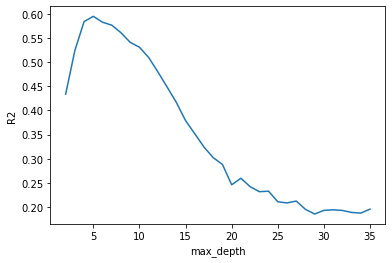

In [61]:
#To help us see the results of trying various tree depths, 
#the following code creates a visualization of R2 vs max_depth
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

From the image above, it looks like the best score for the model is when the parameter max_depth is 5.

In [62]:
# Let's run the model with our optimized value for max_depth
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train, y_train)
train_5_score = dec_tree_5.score(X_train, y_train)
test_5_score = dec_tree_5.score(X_test, y_test)
print(train_5_score)
print(test_5_score)

0.6039397477322956
0.5947099753159972


The training and test results have moved closer to each other (a sign that we have reduced overfitting) and that the testing score is higher.

Bagged Trees

In [63]:
#Step 1: Import the model you want to use
#In sklearn, all machine learning models are implemented as Python classes
from sklearn.ensemble import BaggingRegressor

In [64]:
#Step 2: Make an instance of the Model
bagreg = BaggingRegressor(random_state = 42)

In [65]:
# Look at the hyperparameters
bagreg

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [66]:
#Step 3: Training the model on the data 
#storing the information learned from the data
#Model is learning the relationship between X and y
bagreg.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [67]:
#Step 4: Predict the values for y 
#(remember that this step just allows you to see the actual predictions, )
#(but is not necessary for evaluating or tuning your model)
bagreg.predict(X_test)

array([ 590.43144, 1067.81004,  626.58438, ..., 3395.44684, 2506.00462,
       2307.52964])

In [68]:
#Step 5: Evaluate your model performance
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.919732182879829
0.53098411825262


Random Forest 

In [69]:
# Step 1: Import the model you want to use
# In sklearn, all machine learning models are implemented as Python classes
from sklearn.ensemble import RandomForestRegressor

In [70]:
# Step 2: Make an instance of the Model
rf = RandomForestRegressor(random_state = 42)

In [71]:
# Looking at some hyperparameters that seem tunable
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [72]:
# Step 3: Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [73]:
# Step 4: Predict the values for y 
#(remember that this step just allows you to see the actual predictions)
#(but is not necessary for evaluating or tuning your model)
rf.predict(X_test)

array([ 724.463638,  925.874796,  742.360342, ..., 3740.124842,
       2171.57328 , 2322.170582])

In [74]:
# Step 5: Evaluate your model performance
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9382483229748615
0.5610936996645821


The random forest model improved the r2 value compared to our simple decision tree! In our earlier output, the best r2 value we were able to achieve on our test set was only .594.

In [75]:
# Step 6: Tune your model
# Tuning the max_depth
# can tune the max_depth we allow for each tree in our random forest.  
#Let's set the max_depth to 5 and evaluate our results.
rf_5 = RandomForestRegressor(max_depth = 5, random_state = 42)
rf_5.fit(X_train, y_train)
rf_5_train_score = rf_5.score(X_train, y_train)
rf_5_test_score = rf_5.score(X_test, y_test)
print(rf_5_train_score)
print(rf_5_test_score)

0.6105400088479724
0.6025963335888103


A max_depth of 5 was optimal for the single tree, this is NOT the case for the random forest since our test score marginally increased while our training score dramatically decreased.

To see what the depth of each tree in your random forest was when the max_depth was unlimited, you can use the following code:

In [76]:
[estimator.get_depth() for estimator in rf.estimators_]

[33,
 33,
 40,
 30,
 36,
 41,
 33,
 36,
 32,
 34,
 35,
 38,
 34,
 35,
 33,
 30,
 38,
 35,
 32,
 39,
 32,
 36,
 34,
 34,
 33,
 37,
 39,
 33,
 33,
 35,
 35,
 35,
 35,
 31,
 34,
 31,
 38,
 38,
 35,
 32,
 34,
 35,
 35,
 31,
 33,
 35,
 35,
 37,
 33,
 31,
 36,
 41,
 33,
 38,
 34,
 32,
 35,
 33,
 30,
 34,
 34,
 34,
 31,
 37,
 36,
 34,
 35,
 32,
 31,
 34,
 37,
 33,
 40,
 33,
 31,
 33,
 36,
 33,
 39,
 34,
 37,
 30,
 37,
 35,
 36,
 38,
 34,
 38,
 36,
 34,
 36,
 32,
 32,
 33,
 34,
 31,
 34,
 33,
 33,
 42]

Another tuning parameter is n_estimators (# of decision trees) , which represents the number of trees that should be grown.

Let's see if we can improve our score by doubling the amount of trees from 100 (default parameter) to 200.

In [77]:
# Try 200 trees
rf_200 = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Fit the model
rf_200.fit(X_train, y_train)
# Obtain the scores
rf_200_train_score = rf_200.score(X_train, y_train)
rf_200_test_score = rf_200.score(X_test, y_test)
print(rf_200_train_score)
print(rf_200_test_score)

0.9394471339677474
0.5606394321199984


We hardly have any noticeable improvement with 200 trees compared to the default 100 trees.

RMSE comparison

In [78]:
#RMSE
from sklearn.metrics import mean_squared_error
#RMSE lnreg
print('lnreg Training RMSE:', np.sqrt(mean_squared_error(y_train, lnreg.predict(X_train))))
print('lnreg Testing RMSE:' , np.sqrt(mean_squared_error(y_test, lnreg.predict(X_test))))
#RMSE dec_tree
print('dec_tree_5 Training RMSE:', np.sqrt(mean_squared_error(y_train, dec_tree_5.predict(X_train))))
print('dec_tree_5 Testing RMSE:' , np.sqrt(mean_squared_error(y_test, dec_tree_5.predict(X_test))))
#RMSE bagreg
print('bagreg Training RMSE:', np.sqrt(mean_squared_error(y_train, bagreg.predict(X_train))))
print('bagreg Testing RMSE:' , np.sqrt(mean_squared_error(y_test, bagreg.predict(X_test))))
#RMSE rf
print('rf_5  Training RMSE:', np.sqrt(mean_squared_error(y_train, rf_5.predict(X_train))))
print('rf_5  Testing RMSE:' , np.sqrt(mean_squared_error(y_test, rf_5.predict(X_test))))

lnreg Training RMSE: 1139.1040937388918
lnreg Testing RMSE: 1092.8630817241494
dec_tree_5 Training RMSE: 1082.6461900869947
dec_tree_5 Testing RMSE: 1057.4431299496734
bagreg Training RMSE: 487.3900381277651
bagreg Testing RMSE: 1137.5430389051805
rf_5  Training RMSE: 1073.5872542554382
rf_5  Testing RMSE: 1047.1044311431237


Feature importance

In [83]:
data = {'Feature': X.columns, 'Importance': rf.feature_importances_}
feature_importances = pd.DataFrame(data)
feature_importances

,Feature,Importance
0,Item_Weight,0.052561
1,Item_Visibility,0.098699
2,Item_MRP,0.440869
3,Outlet_Establishment_Year,0.025007
4,Item_Fat_Content_Low Fat,0.005078
5,Item_Fat_Content_Regular,0.005041
6,Item_Type_Baking Goods,0.004053
7,Item_Type_Breads,0.002557
8,Item_Type_Breakfast,0.002617
9,Item_Type_Canned,0.004244


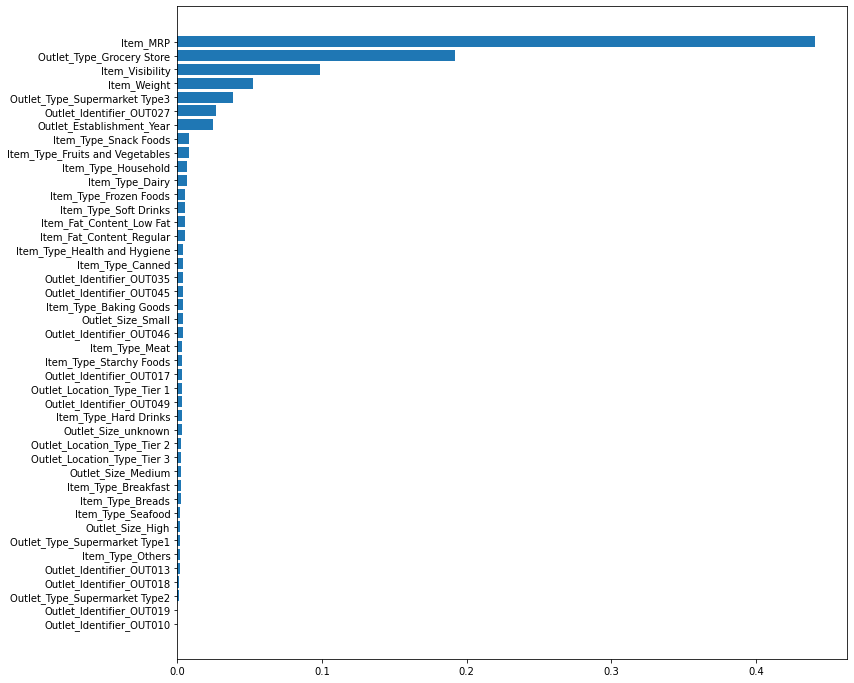

In [84]:
feature_importances.sort_values(by = 'Importance', inplace = True)
plt.figure(figsize = (12, 12))
plt.barh(feature_importances['Feature'], feature_importances['Importance']);